<a href="https://colab.research.google.com/github/khatana706/DATA-SCIENCE/blob/main/OCR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pytesseract

In [4]:
import cv2
from PIL import Image

#how to open a Image

In [6]:
!pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
my_img= Image.open('/content/linkden_pic.jpg')
print(my_img)
print(my_img.size)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=560x560 at 0x7FD09170FF50>
(560, 560)


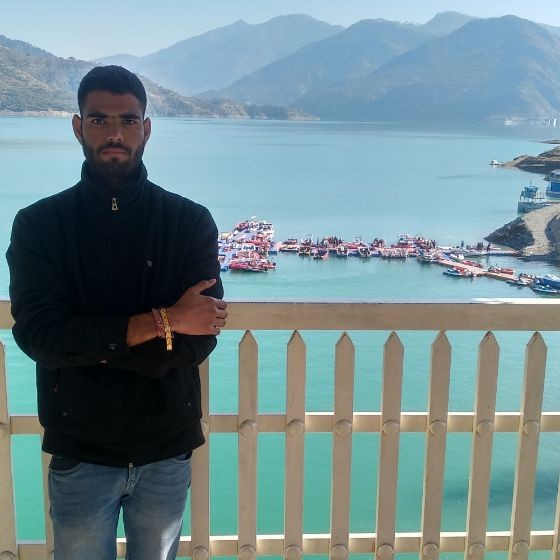

In [8]:
my_img

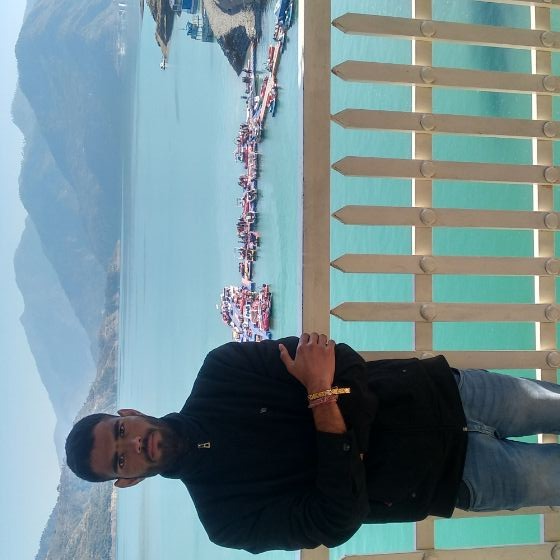

In [9]:
my_img.rotate(90)

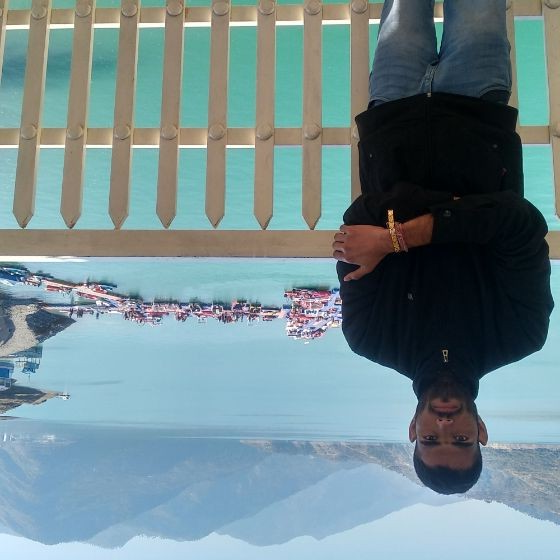

In [10]:
my_img.rotate(180)

In [11]:
my_img.save('/content/temp22linkden_pic.jpg')

#how to preprocess images for text OCR

In [14]:
#preprocessing images for OCR

In [15]:
import cv2
from matplotlib import pyplot as plt
image_file = "/content/Standard Cover Letter (2).jpg"
img = cv2.imread(image_file) 

In [22]:
#cv2.imshow("original image", img)
#cv2.waitKey(0)

In [23]:
def display(im_path):
  dpi = 80
  im_data = plt.imread(im_path)
  height, width, depth = im_data.shape
  
  #what size does the figure need to be in inches to fit images
  figsize = width / float(dpi), height / float(dpi)
  
  #create a figure of the right size with on axes that images
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0,0,1,1])

  #hide spines ticks etc.
  ax.axis('off')

  #display the images.
  ax.imshow(im_data, cmap='gray')
  plt.show()


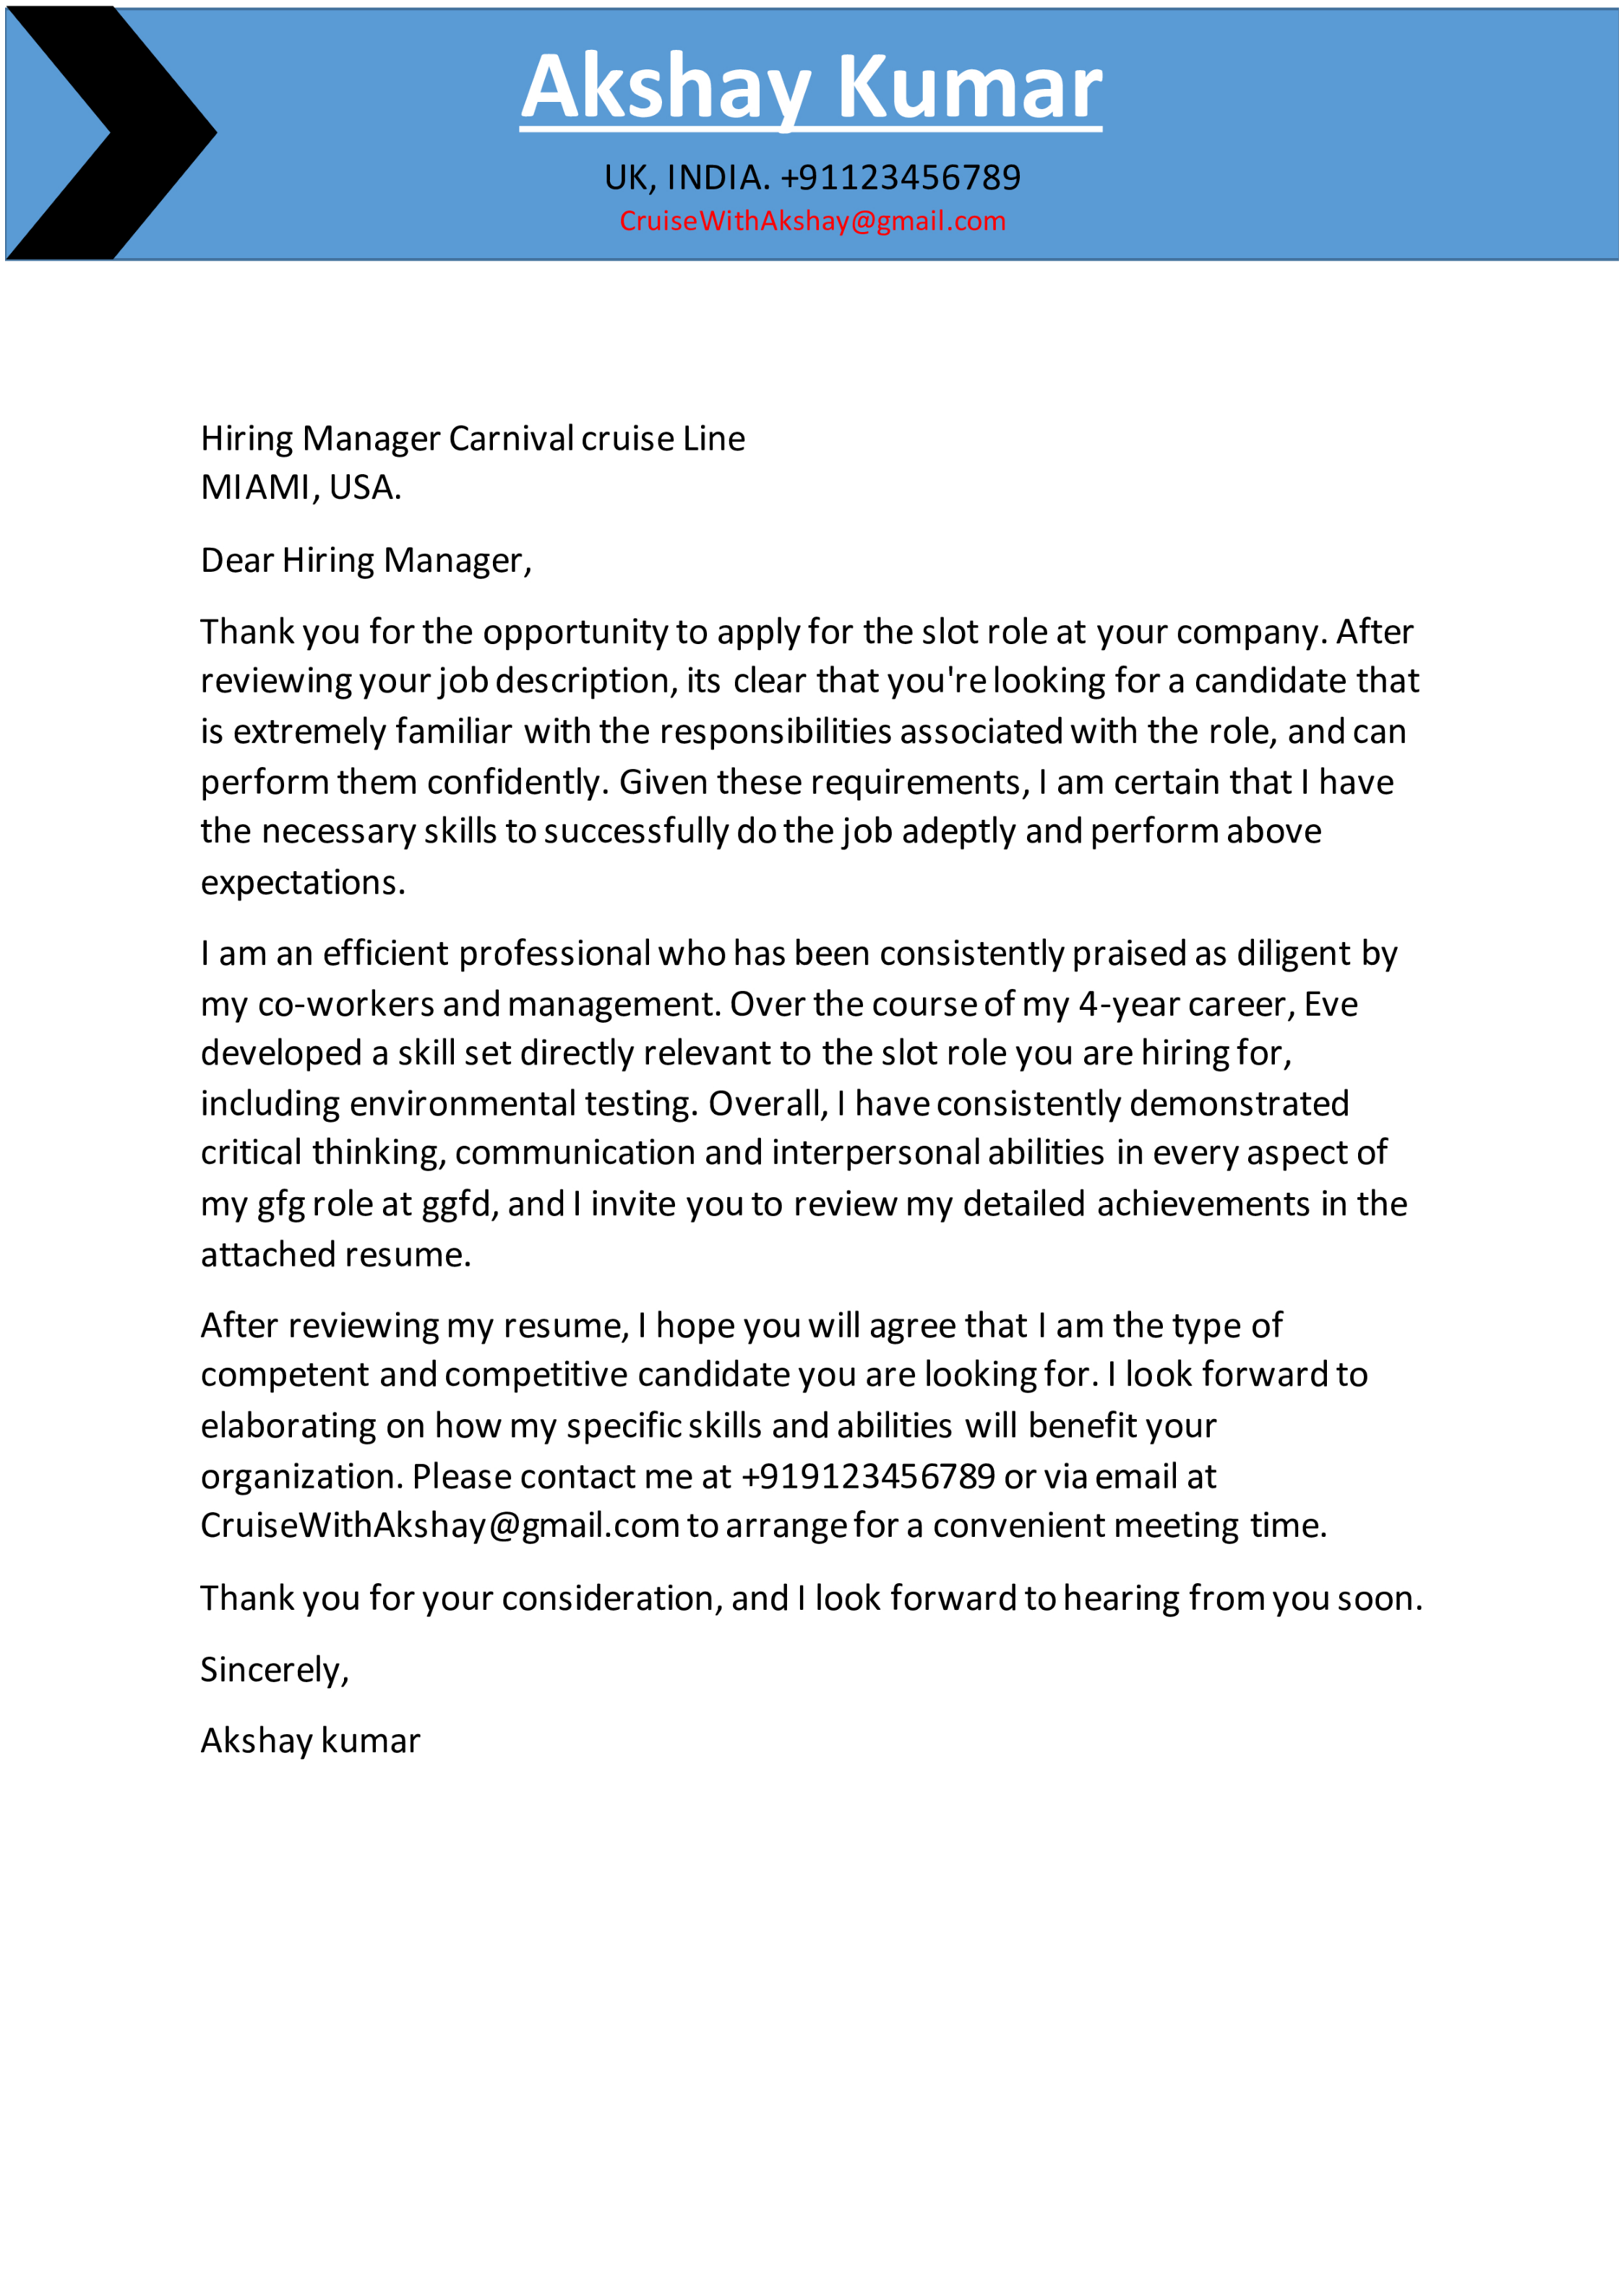

In [24]:
display(image_file)

In [25]:
#inverted images

In [28]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite("temp_inverted.jpg", inverted_image)

True

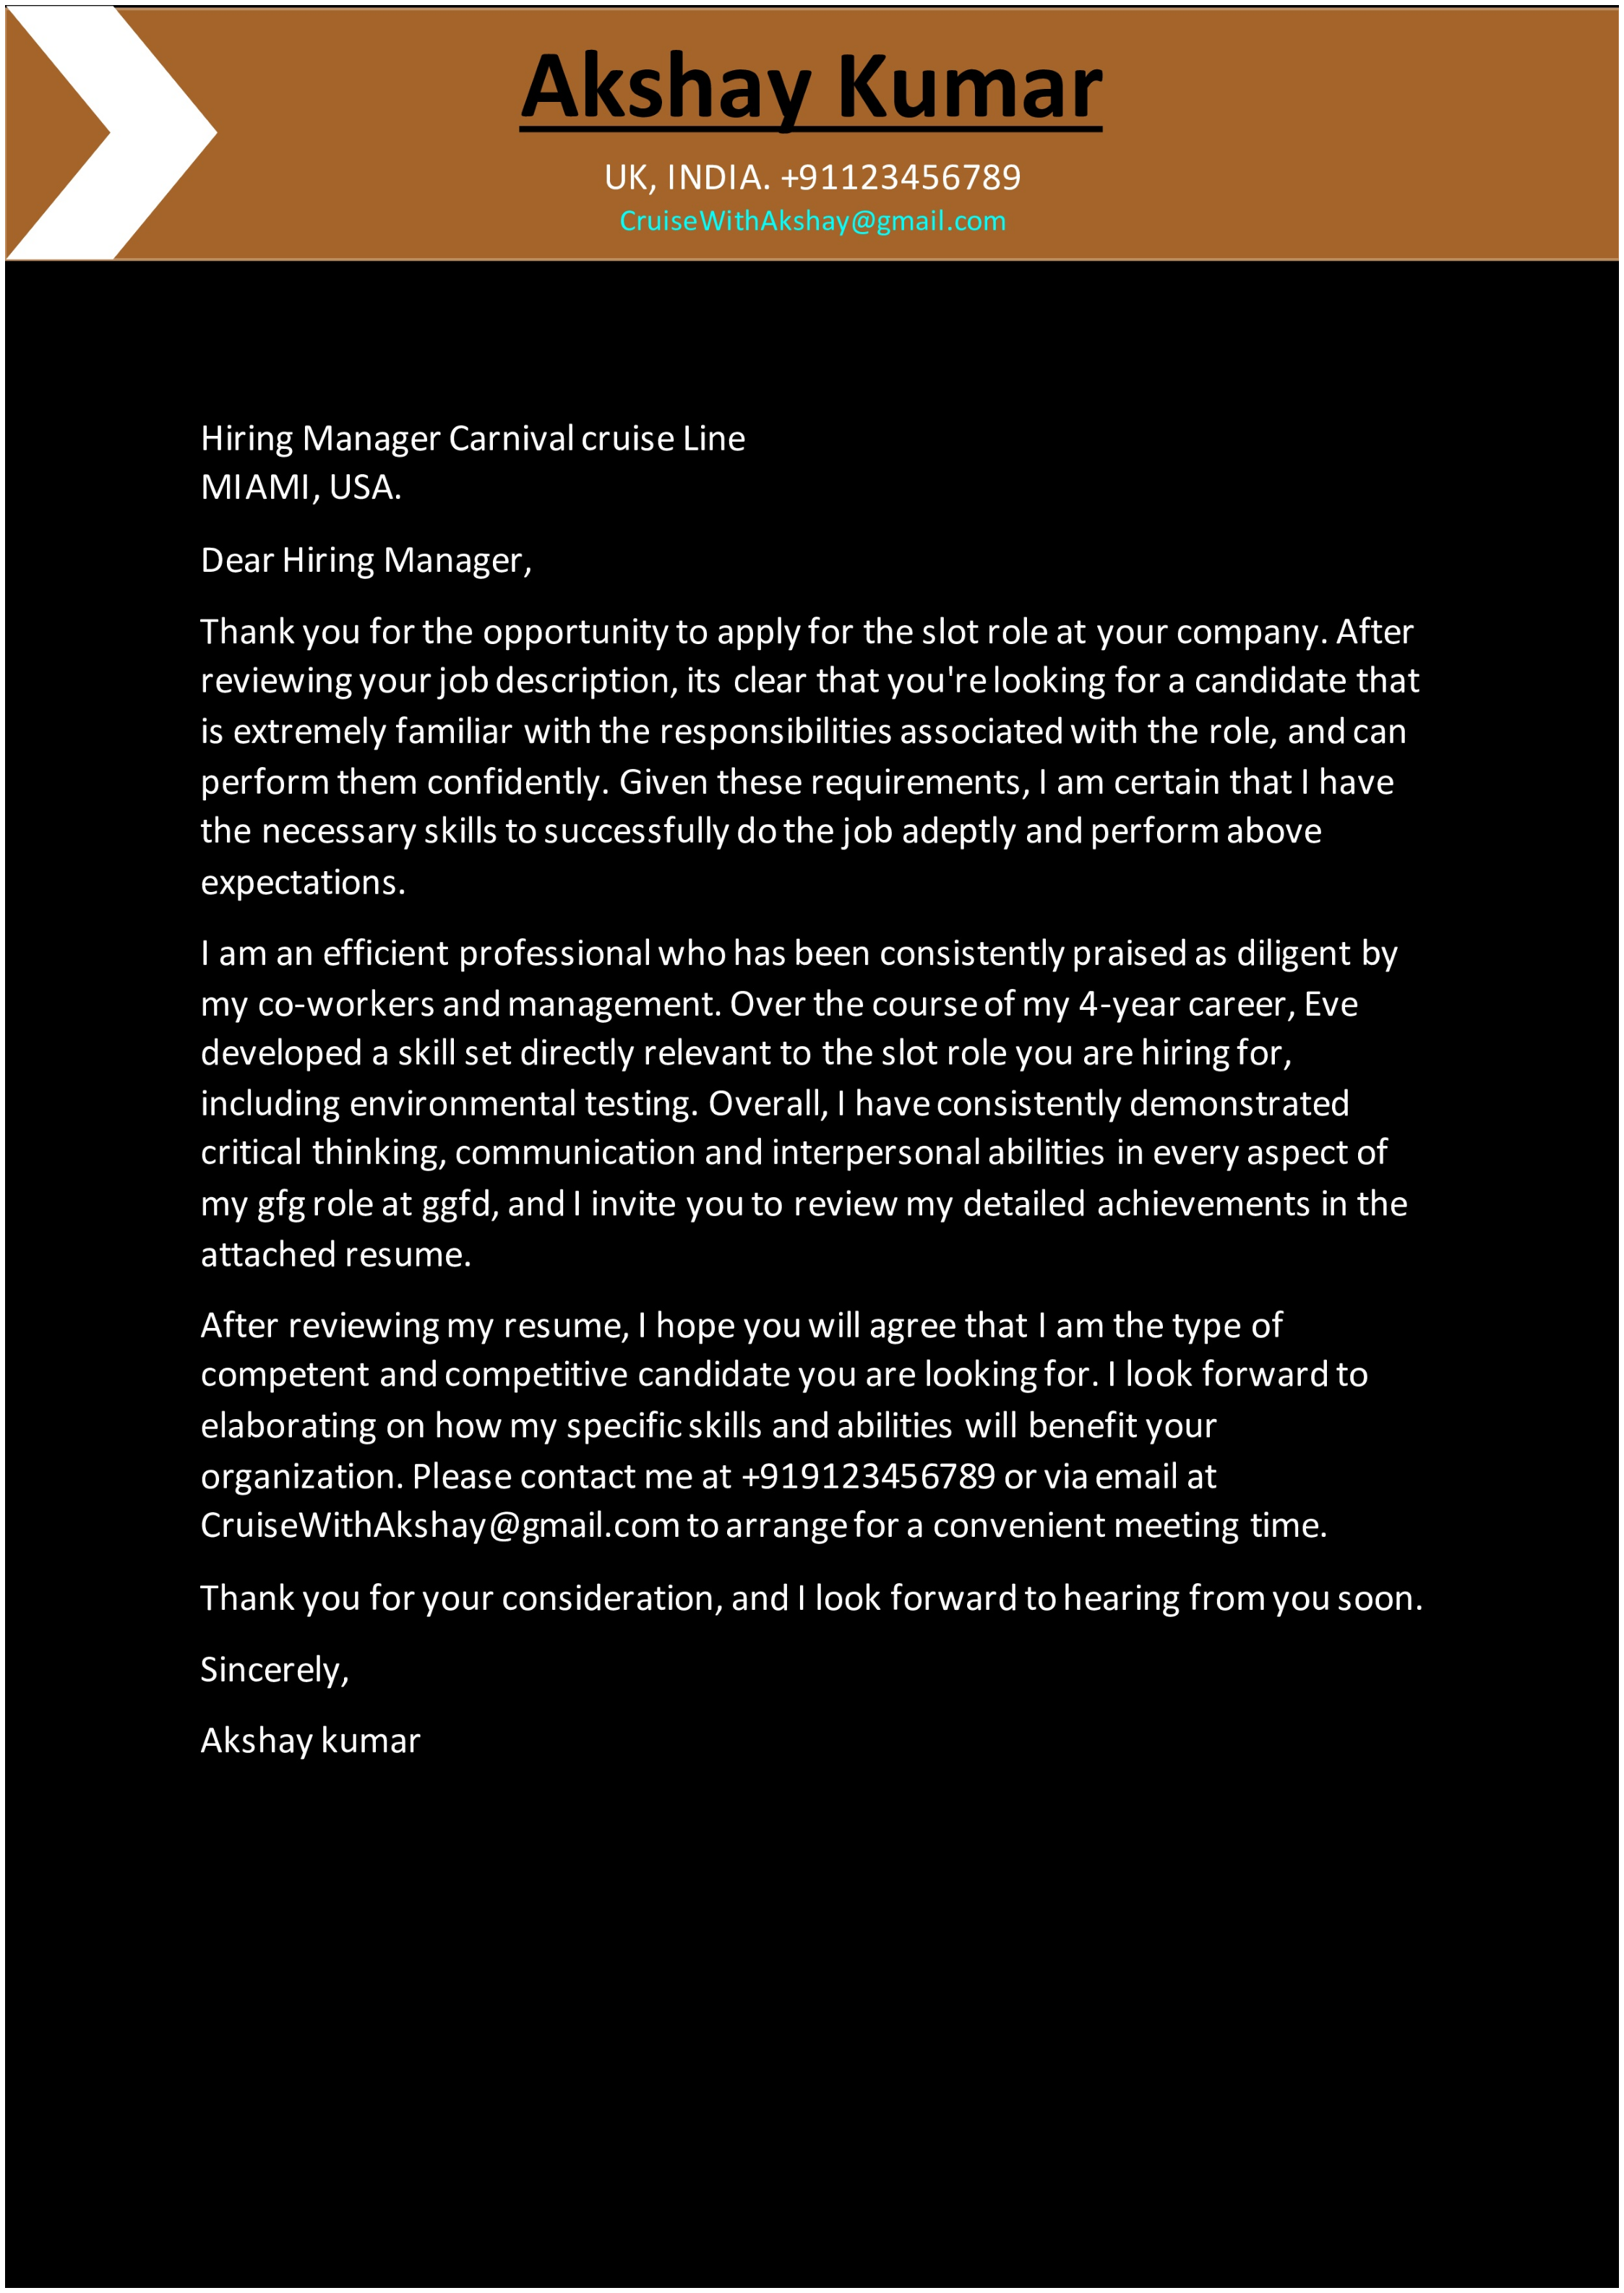

In [30]:
display("temp_inverted.jpg")

In [ ]:
#Rescaling

In [ ]:
#Binarizations

In [45]:
def grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  cv2.imwrite("temp_gray_img.jpg",image)

In [50]:
gray_images = grayscale(img)
cv2.imwrite("temp_gray_images.jpg", gray_images)


True

In [48]:
display("temp_gray_images.jpg")

ValueError: ignored

In [51]:
thresh, im_bw = cv2.threshold(gray_images, 200, 255, cv2.THRESH_BINARY)
cv2.imwrite("temp_bw_images.jpg", im_bw)

True

In [52]:
display("temp_bw_images.jpg")

ValueError: ignored

In [53]:
#Noise removel

In [54]:
def noise_removel(image):
  import numpy as np
  kernel = np.ones((1, 1), np.uint8)
  image = cv2.dilate(image, kernel, iterations=1)
  kernel = np.ones((1,1), np.uint8)
  image = cv2.erode(image, kernel, iterations=1)
  image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  image = cv2.medianBlur(image, 3)
  return(image)

In [55]:
no_noise = noise_removel(im_bw)
cv2.imwrite("temp_no_noise.jpg", no_noise)


True

In [56]:
display("temp_no_noise.jpg")

ValueError: ignored

In [57]:
#Dilations and Erosion

In [60]:
def thin_font(image):
  import numpy as np
  image = cv2.bitwise_not(image)
  kernel1 = np.ones((2,2),np.unit8)
  image = cv2.erode(image, kernel, iterations=10)
  image = cv2.bitwise_not(image)
  return(image)

In [62]:
erode_image = thin_font(no_noise)
cv2.imwrite("temp_erode_image.jpg", erode_image)

AttributeError: ignored

In [63]:
display(temp_erode_image)

NameError: ignored

In [ ]:
def thick_font(image):
  import numpy as np
  image = cv2.bitwise_not(image)
  kernel1 = np.ones((2,2),np.unit8)
  image = cv2.dilate(image, kernel, iterations=10)
  image = cv2.bitwise_not(image)
  return(image)

In [ ]:
dilated_image = thick_font(no_noise)
cv2.imwrite("temp_dilate_image.jpg", dilated_image)

In [ ]:
#Rotations and Deskewing

In [ ]:
import numpy as np

def 